In [5]:
import numpy as np
import json
import nltk
import tensorflow as tf

In [6]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Load the training and testing data
with open('intents.json') as f:
    intents = json.load(f)

with open('intents_testing.json') as f:
    testing_intents = json.load(f)

# Preprocess the data
words = []
labels = []
docs_x = []
docs_y = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the pattern
        wrds = nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs_x.append(wrds)
        docs_y.append(intent['tag'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Convert the words and labels to unique arrays
words = sorted(set(words))
labels = sorted(set(labels))

# Create training and testing data sets
training = []
output = []
out_empty = [0] * len(labels)

for i, doc in enumerate(docs_x):
    bag = []

    for word in words:
        if word in doc:
            bag.append(1)
        else:
            bag.append(0)

    output_row = out_empty[:]
    output_row[labels.index(docs_y[i])] = 1

    training.append(bag)
    output.append(output_row)

training = np.array(training)
output = np.array(output)


In [8]:
import random
data_file = open('intents_testing.json').read()
intents_testing= json.loads(data_file)
words_testing=[]
classes_testing = []
documents_testing = []

for intent in intents_testing['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words_testing.extend(w)
        documents_testing.append((w, intent['tag']))
        if intent['tag'] not in classes_testing:
            classes_testing.append(intent['tag'])

words_testing = [(w.lower()) for w in words_testing ]
words_testing = sorted(list(set(words_testing)))

classes_testing = sorted(list(set(classes_testing)))

testing = []

output_empty = [0] * len(classes_testing)
for doc in documents_testing:
    bag = []
    pattern_words = doc[0]
    pattern_words = [(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes_testing.index(doc[1])] = 1
    
    testing.append([bag, output_row])
random.shuffle(testing)
testing = np.array(testing)
test_x = list(testing[:,0])
test_y = list(testing[:,1])
print("Training data created")





Training data created


/tmp/ipykernel_516869/2311454109.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testing = np.array(testing)


In [9]:

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(words), 64),
    tf.keras.layers.GRU(64, dropout=0.1),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
hist=model.fit(training, output,validation_data=(test_x, test_y), epochs=50, batch_size=8)
# hist = model.fit(data, encoded_labels, validation_data=(data, encoded_labels), epochs=100, batch_size=8, verbose=1)



Epoch 1/50


2023-04-27 01:02:37.661246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 01:02:37.663547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 01:02:37.665250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - ETA: 0s - loss: 3.6059 - accuracy: 0.0711

2023-04-27 01:03:51.497115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 01:03:51.499664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 01:03:51.501748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - 75s 664ms/step - loss: 3.6059 - accuracy: 0.0711 - val_loss: 3.8258 - val_accuracy: 0.0263
Epoch 2/50
109/109 [==============================] - 72s 664ms/step - loss: 3.4985 - accuracy: 0.0952 - val_loss: 3.8465 - val_accuracy: 0.0263
Epoch 3/50
109/109 [==============================] - 72s 660ms/step - loss: 3.4815 - accuracy: 0.1078 - val_loss: 3.8719 - val_accuracy: 0.0263
Epoch 4/50
109/109 [==============================] - 73s 666ms/step - loss: 3.4749 - accuracy: 0.1078 - val_loss: 3.8905 - val_accuracy: 0.0263
Epoch 5/50
109/109 [==============================] - 72s 657ms/step - loss: 3.4771 - accuracy: 0.1078 - val_loss: 3.8809 - val_accuracy: 0.0263
Epoch 6/50
109/109 [==============================] - 72s 660ms/step - loss: 3.4761 - accuracy: 0.1078 - val_loss: 3.9181 - val_accuracy: 0.0263
Epoch 7/50
109/109 [==============================] - 70s 638ms/step - loss: 3.4738 - accuracy: 0.1078 - val_loss: 3.8858 - val_accuracy: 0.0

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get the model's predictions for the training set
y_train_pred = model.predict(training)

# Convert the predicted probabilities to binary predictions
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Compute the precision, recall, and f1 score
train_accuracy = accuracy_score(output, y_train_pred_binary)
train_precision = precision_score(output, y_train_pred_binary, average='weighted')
train_recall = recall_score(output, y_train_pred_binary, average='weighted')
train_f1 = f1_score(output, y_train_pred_binary, average='weighted')

print('Training accuracy:', train_accuracy)
print('Training precision:', train_precision)
print('Training recall:', train_recall)
print('Training f1 score:', train_f1)


2023-04-27 01:58:10.458849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 01:58:10.460660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 01:58:10.462015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 4s 119ms/step
Training accuracy: 0.0860091743119266
Training precision: 0.09465357464216473
Training recall: 0.0860091743119266
Training f1 score: 0.09012045185046495


/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get the model's predictions for the test set
y_pred = model.predict(test_x)

# Convert the predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the precision, recall, and f1 score
test_accuracy = accuracy_score(test_y, y_pred_binary)
precision = precision_score(test_y, y_pred_binary,average='weighted')
recall = recall_score(test_y, y_pred_binary, average='weighted')
f1 = f1_score(test_y, y_pred_binary, average='weighted')

print('Training accuracy:', test_accuracy)
print('Testing precision:', precision)
print('Testing recall:', recall)
print('Testing f1 score:', f1)


3/3 [==============================] - 0s 86ms/step
Training accuracy: 0.039473684210526314
Testing precision: 0.05263157894736842
Testing recall: 0.039473684210526314
Testing f1 score: 0.043859649122807015


/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


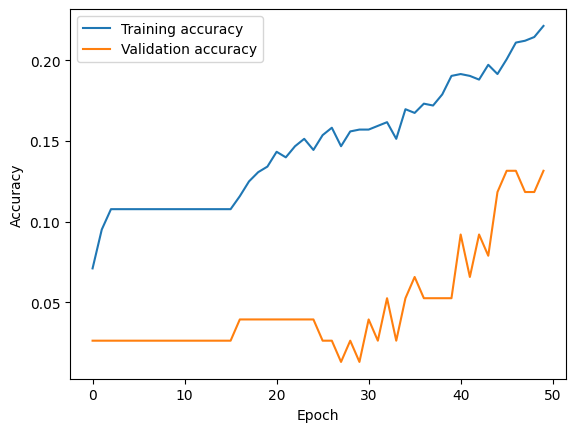

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over time
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



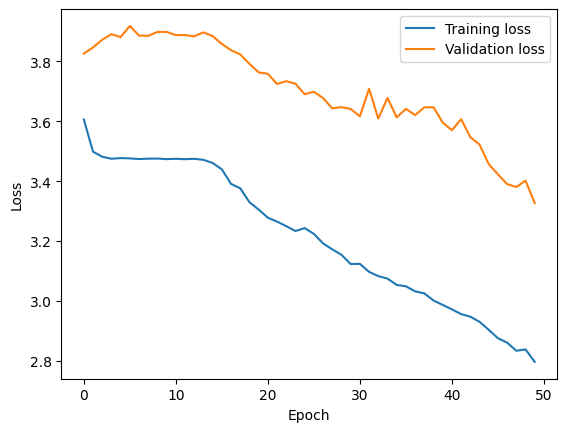

In [13]:
# Plot the training and validation loss over time
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [34]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def create_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    gru = GRU(units=64, activation='tanh')(inputs)
    outputs = Dense(1, activation='sigmoid')(gru)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Define the scoring metric
scoring_metric = make_scorer(accuracy_score)

# Create the KerasClassifier object
model = KerasClassifier(build_fn=create_gru_model, input_shape=(training.shape[1], 1), epochs=10, batch_size=32)

# Evaluate the estimator using cross-validation
cv_scores = cross_val_score(model, training, output, cv=5, scoring=scoring_metric)

# Print the cross-validation scores
print(cv_scores)


/tmp/ipykernel_516869/1693207763.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_gru_model, input_shape=(training.shape[1], 1), epochs=10, batch_size=32)


Epoch 1/10


2023-04-27 02:25:08.635252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:08.637415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:08.639279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 9ms/step - loss: 0.6927 - accuracy: 0.5125
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.5250
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6905 - accuracy: 0.5375
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.5500
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6873 - accuracy: 0.5500
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6858 - accuracy: 0.5625
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6833 - accuracy: 0.5500
Epoch 8/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6807 - accuracy: 0.5875
Epoch 9/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6765 - accuracy: 0.6250
Epoch 10/10
1/1 [==============================] - 0s 316ms/step


2023-04-27 02:25:11.358099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:11.359574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:11.360801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-04-27 02:25:11.662671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:11.664042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:11.665340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 12ms/step - loss: 0.6924 - accuracy: 0.5750
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 0.6893 - accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6867 - accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6839 - accuracy: 0.6125
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6820 - accuracy: 0.6125
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6788 - accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6758 - accuracy: 0.6000
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6717 - accuracy: 0.6000
Epoch 9/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6663 - accuracy: 0.6125
Epoch 10/10
1/1 [==============================] - 0s 305ms/step


2023-04-27 02:25:14.607937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:14.610128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:14.611413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-04-27 02:25:14.970464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:14.972600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:14.974327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 10ms/step - loss: 0.7040 - accuracy: 0.4750
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 0.7021 - accuracy: 0.4375
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6992 - accuracy: 0.4750
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6973 - accuracy: 0.4875
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6967 - accuracy: 0.4875
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6945 - accuracy: 0.4875
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.4875
Epoch 8/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6890 - accuracy: 0.5375
Epoch 10/10
1/1 [==============================] - 0s 374ms/step


2023-04-27 02:25:18.102947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:18.107091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:18.110361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-04-27 02:25:18.499976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:18.501409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:18.502471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 9ms/step - loss: 0.6936 - accuracy: 0.4875
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6920 - accuracy: 0.4875
Epoch 4/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.5125
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6902 - accuracy: 0.5375
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6898 - accuracy: 0.5250
Epoch 8/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6893 - accuracy: 0.5375
Epoch 9/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.5500
Epoch 10/10
1/1 [==============================] - 0s 311ms/step


2023-04-27 02:25:21.519033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:21.521100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:21.522367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-04-27 02:25:21.871503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:21.872989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:21.874064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 2s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6895 - accuracy: 0.5625
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6884 - accuracy: 0.5250
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6862 - accuracy: 0.5625
Epoch 6/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6848 - accuracy: 0.5500
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6816 - accuracy: 0.5750
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6772 - accuracy: 0.5875
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6713 - accuracy: 0.6125
Epoch 10/10
1/1 [==============================] - 1s 780ms/step
[0.55 0.45 0.6  0.4  0.35]


2023-04-27 02:25:25.119978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 02:25:25.121521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 02:25:25.122619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus